In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load Dataset

In [70]:
#read csv file
data = pd.read_csv(r"D:\Abdulrahman\Advanced Data Anaysis\Projects\The Power Of Statistics\ab_data.csv")

In [71]:
#display first 10 columns
data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [72]:
#display basic information about the data such as the number of non-empty values, data type, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [73]:
#display columns name
data.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [74]:
#check for missing value
data.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [75]:
#check for duplicated data
data.duplicated().sum()

0

Data Cleaning

In [76]:
# Change column name group to group_type
data = data.rename(columns= {'group':'group_type'})

In [77]:
#delete timestamp column
del data['timestamp']

In [78]:
# how many users in the control group viewed the new page (experiment error)
((data['group_type'] == 'control') & (data['landing_page'] == 'new_page')).sum()

1928

In [79]:
# how many users in the treatment group viewed the old page (experiment error)
((data['group_type'] == 'treatment') & (data['landing_page'] == 'old_page')).sum()

1965

In [80]:
# copy data in data_backup
data_backup = data.copy()

In [81]:
# make function to remove invlalid data
def remove_invalid_data(df):
  """
    Removes rows where:
    - control group saw the new page
    - treatment group saw the old page
  """
  df = df.loc[~((df['group_type'] == 'control') & (df['landing_page']== 'new_page'))]
  df = df.loc[~((df['group_type'] == 'treatment') & (df['landing_page']== 'old_page'))]

  return df

In [82]:
#calling function and save it in data
data = remove_invalid_data(data)

In [83]:
#check again for  how many users in the control group viewed the new page (experiment error)
((data['group_type'] == 'control') & (data['landing_page'] == 'new_page')).sum()

0

In [84]:
#check again for how many users in the treatment group viewed the old page (experiment error)
((data['group_type'] == 'treatment') & (data['landing_page'] == 'old_page')).sum()

0

In [85]:
# copy data in data_backup
data_backup = data.copy()

In [86]:
data.head(10)

,user_id,group_type,landing_page,converted
0,851104,control,old_page,0
1,804228,control,old_page,0
2,661590,treatment,new_page,0
3,853541,treatment,new_page,0
4,864975,control,old_page,1
5,936923,control,old_page,0
6,679687,treatment,new_page,1
7,719014,control,old_page,0
8,817355,treatment,new_page,1
9,839785,treatment,new_page,1


 Conversion Rate Analysis

In [99]:
conversion_rate = data.groupby(['group_type' ,'converted']).count()
conversion_rate

user_id  landing_page
group_type converted                       
control    0           127785        127785
           1            17489         17489
treatment  0           128047        128047
           1            17264         17264

In [88]:
# Number of conversions in each group
control_converted = 17489
control_total = 127785 + 17489

treatment_converted = 17264
treatment_total = 128047 + 17264

# Calculate conversion rate
control_rate = control_converted / control_total
treatment_rate = treatment_converted / treatment_total

# Print results
print(f"Control Conversion Rate: {control_rate:.4f}")
print(f"Treatment Conversion Rate: {treatment_rate:.4f}")

#  comparison check for whats bigger in rate treatment or control
if treatment_rate > control_rate:
    print("Treatment group (new page) has a higher conversion rate.")
else:
    print("Control group (old page) has a higher conversion rate.")

Control Conversion Rate: 0.1204
Treatment Conversion Rate: 0.1188
Control group (old page) has a higher conversion rate.


In [89]:
# # Split the data into control and treatment groups based on 'group_type'
control_group = data[data['group_type']== 'control']
treatment_group = data[data['group_type'] == 'treatment'] 

Visualization

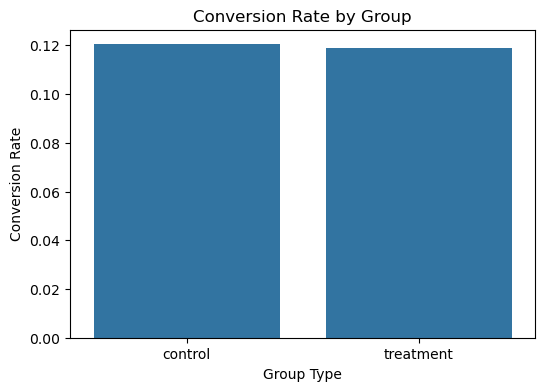

In [90]:
# Calculate the conversion rate for each group (control and treatment)
conversion_rates = data.groupby('group_type')['converted'].mean().reset_index()

# Plot a Bar Plot
plt.figure(figsize=(6,4))
sns.barplot(x='group_type', y='converted', data=conversion_rates)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group Type')
plt.show()

This bar plot displays the conversion rates for the control group (old page) and the treatment group (new page). It visually compares the proportion of users who converted in each group, helping to understand which page performed better in the A/B test.


Sampling for t-test

In [91]:
# # Take random samples of 1000 rows from each group to ensure balanced comparison
control_group = control_group.sample(n = 1000, random_state= 42)
treatment_group = treatment_group.sample(n = 1000, random_state= 42)

In [92]:
# Calculate the conversion rate for the control group
control_mean = control_group['converted'].mean()
control_mean

0.11

In [93]:
# Calculate the conversion rate for the treatment group
treatment_mean = treatment_group['converted'].mean()
treatment_mean

0.118

In [96]:
data_backup = data.copy()

 Hypothesis Testing

**Null Hypothesis (H0):**  There is no difference in the conversion rates between the control group and the treatment group.  

**Alternative Hypothesis (H1):**  There is a difference in the conversion rates between the control group and the treatment group.  


In [97]:
significance_level = 0.05

In [98]:
# Perform two-sample t-test (Welch's t-test) to compare group means
tstat, pvalue = stats.ttest_ind(control_group['converted'],treatment_group['converted'], equal_var = False)
tstat, pvalue

(-0.5626299509256636, 0.5737500723738465)

# 📚 Interpretation

### T-test Results

- **T-statistic:** -0.56  
- **P-value:** 0.57  

### 📌 Conclusion:

Since the p-value is greater than 0.05, we **fail to reject the null hypothesis**. This means there's no statistically significant difference in conversion rates between users who saw the old page and those who saw the new one.

The company may decide to keep the old page, as it performs similarly to the new design in terms of conversion.

---

## 📌 Why Use a t-test?

The **t-test** is suitable for comparing the means of two independent groups. Though `converted` is binary, the **mean of a binary variable** represents the **proportion**, making this valid. Welch’s version is chosen because it does **not assume equal variances** between groups.

---

## 🎯 Why Sample 1000 Users?

- Avoid long runtime on large datasets.
- Prevent overfitting on massive samples.
- Balance group sizes fairly.
- Ensure manageable, fast, and interpretable analysis.

Random sampling ensures **representativeness** and **eliminates bias** due to time or ordering in data.

This is a practical strategy for **exploratory analysis** — final production decisions may require testing on the **full dataset**.

